In [41]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [51]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/2025-04-18"
os.chdir(folder)
fname1 = "finalized-pCAG_GFP_Halo-JFX650-GFP-DAPI-07-JFX650.csv"
fname2 = "finalized-pCAG_GFP_Halo-JFX650-GFP-DAPI-07-GFP.csv"
fname3 = "finalized-pCAG_GFP_Halo-JFX650-GFP-DAPI-07-DAPI.csv"

df1 = pd.read_csv(fname1)
df2 = pd.read_csv(fname2)
df3 = pd.read_csv(fname3)

label1 = "JFX650"
label2 = "GFP"
label3 = "DAPI"

In [52]:
def normalize(values):
    minval = values.min()
    normval = (values - minval) / np.ptp(values)
    return normval

key1 = df1.keys()[0]
df = pd.DataFrame(
    {
        "pixels": np.concat(
            [
                df1[key1].to_numpy(),
                df2[key1].to_numpy(),
                df3[key1].to_numpy(),
            ]
        ),
        "label": np.concat(
            [
                np.repeat(label1, df1.shape[0]),
                np.repeat(label2, df2.shape[0]),
                np.repeat(label3, df3.shape[0]),
            ]
        ),
        "normval": np.concat(
            [
                normalize(df1["Gray_Value"].to_numpy()),
                normalize(df2["Gray_Value"].to_numpy()),
                normalize(df3["Gray_Value"].to_numpy()),
            ]
        ),
    }
)

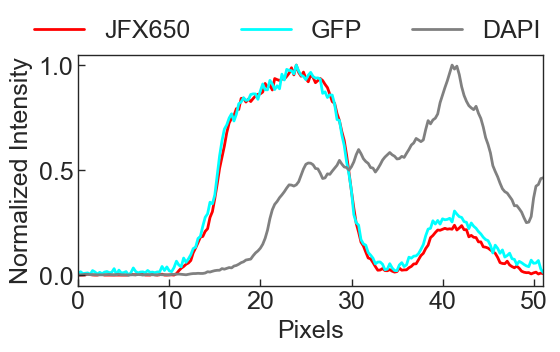

In [56]:
plt.figure(figsize=(6, 3))
ax = sns.lineplot(
    data=df,
    x="pixels",
    y="normval",
    hue="label",
    lw=2,
    dashes=False,
    palette=["red", "cyan", "gray"],
)

sns.move_legend(
    ax,
    "upper center",
    bbox_to_anchor=(0.45, 1.25),
    ncol=3,
    title=None,
    frameon=False,
    fontsize=18,
)

plt.xlim(df.pixels.min(), df.pixels.max())
# plt.ylim(0, 7)
ax.set_xlabel("Pixels", fontsize=18, loc="center")
plt.ylabel("Normalized Intensity", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

plt.savefig(
    "CrossSectionLineNormalized-pleaserename.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)